<a href="https://colab.research.google.com/github/UsmanHaziq/CASE--I-Lungs-cancer/blob/main/R-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Load the data
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Train",
    image_size=(224, 224),
    batch_size=32
)

Found 357 files belonging to 3 classes.


In [14]:
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Val",
    image_size=(224, 224),
    batch_size=32
)

Found 77 files belonging to 3 classes.


In [15]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Test",
    image_size=(224, 224),
    batch_size=32
)


Found 76 files belonging to 3 classes.


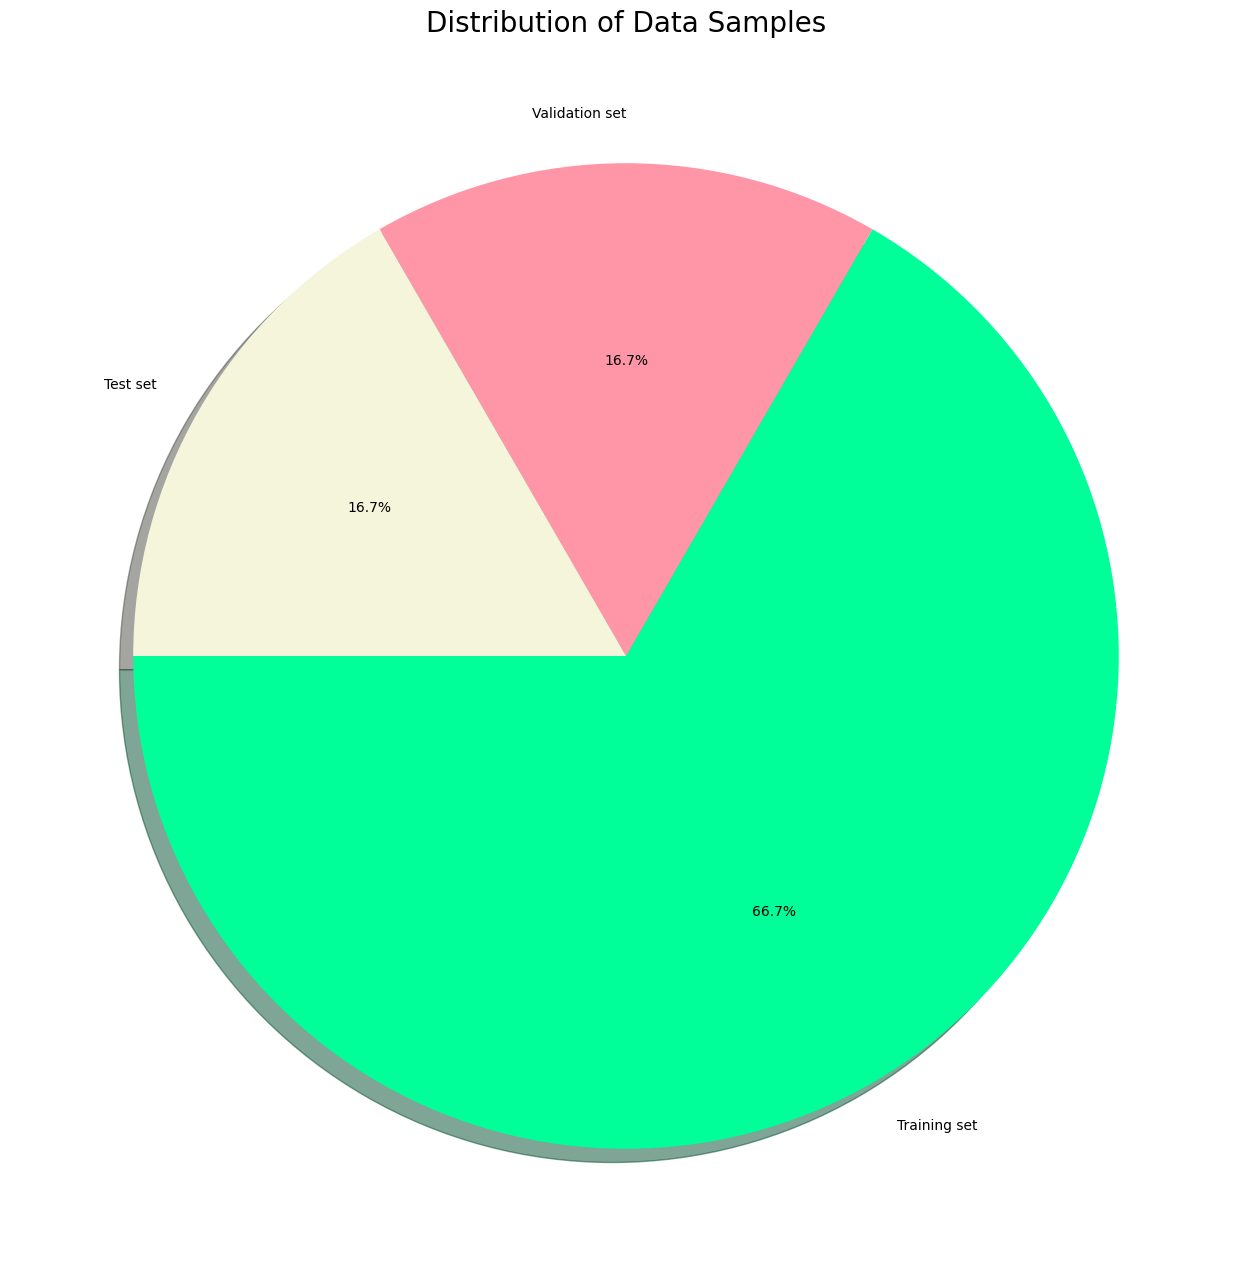

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data Samples', fontsize=20)
plt.show()



In [17]:

class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [18]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break


(32, 224, 224, 3)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers

class RPN(tf.keras.Model):
    def __init__(self, num_anchors):
        super(RPN, self).__init__()
        self.conv = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')
        self.cls_layer = layers.Conv2D(num_anchors, kernel_size=1)
        self.reg_layer = layers.Conv2D(num_anchors * 4, kernel_size=1)

    def call(self, inputs):
        x = self.conv(inputs)
        cls_logits = self.cls_layer(x)
        reg_deltas = self.reg_layer(x)
        return [cls_logits, reg_deltas]

class FasterRCNN(tf.keras.Model):
    def __init__(self, num_classes, num_anchors):
        super(FasterRCNN, self).__init__()
        self.backbone = ResNet50()  # Replace with your desired backbone network
        self.rpn = RPN(num_anchors)
        self.roi_align = layers.RoIAlign(pool_size=7, stride=2)
        self.classifier = layers.Dense(num_classes, activation='softmax')
        self.regressor = layers.Dense(4)

    def call(self, inputs):
        # Feature extraction
        features = self.backbone(inputs)

        # Region proposal network
        cls_logits, reg_deltas = self.rpn(features)

        # Generate region proposals
        proposals = generate_proposals(cls_logits, reg_deltas)

        # Extract ROI features
        roi_features = self.roi_align(features, proposals)

        # Classification and regression
        class_predictions = self.classifier(roi_features)
        bbox_predictions = self.regressor(roi_features)

        return [class_predictions, bbox_predictions, proposals]

# Define the ResNet50 backbone network
class ResNet50(tf.keras.Model):
    def __init__(self):
        super(ResNet50, self).__init__()
        # Define the layers of the ResNet50 network here

In [35]:
# Compile the model
model.compile(
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 optimizer="adam",
 metrics=["accuracy"]
)

In [36]:
import time
start_time=time.time()
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=60,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)
end_time=time.time()
elapsed_time=end_time=start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 62s 5s/step - loss: 2.7192 - accuracy: 0.9580 - val_loss: 197.5835 - val_accuracy: 0.5325
Epoch 2/60
12/12 [==============================] - 60s 5s/step - loss: 0.8160 - accuracy: 0.9832 - val_loss: 247.2982 - val_accuracy: 0.4156
Epoch 3/60
12/12 [==============================] - 59s 5s/step - loss: 1.1508 - accuracy: 0.9664 - val_loss: 303.2830 - val_accuracy: 0.4416
Epoch 4/60
12/12 [==============================] - 59s 5s/step - loss: 1.3949 - accuracy: 0.9636 - val_loss: 764.0952 - val_accuracy: 0.3506
Epoch 5/60
12/12 [==============================] - 59s 5s/step - loss: 3.9452 - accuracy: 0.9636 - val_loss: 638.4913 - val_accuracy: 0.6494
Epoch 6/60
12/12 [==============================] - 59s 5s/step - loss: 4.1975 - accuracy: 0.9580 - val_loss: 391.9478 - val_accuracy: 0.5844
Epoch 7/60
12/12 [==============================] - 59s 5s/step - loss: 2.3214 - accuracy: 0.9664 - val_loss: 620.3766 - val_accuracy: 0.3766
Epoch 8/60
12/12 

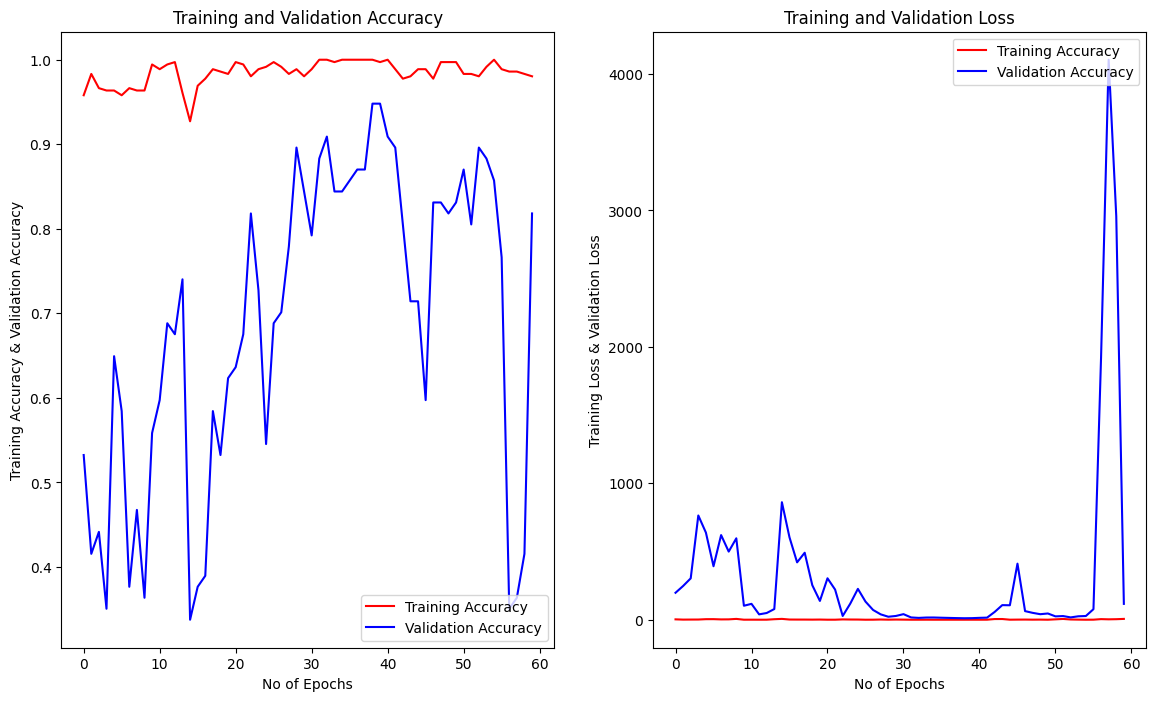

In [37]:
# Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy',color='red')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Accuracy',color='red')
plt.plot(range(len(val_loss)), val_loss, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
loss,accuracy=model.evaluate(train_set)
accuracy*100

12/12 [==============================] - 11s 784ms/step - loss: 35.5241 - accuracy: 0.9300


92.9971992969513

In [39]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

3/3 [==============================] - 4s 1s/step - loss: 116.1411 - accuracy: 0.8182


81.81818127632141

In [40]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100


3/3 [==============================] - 14s 574ms/step - loss: 120.1743 - accuracy: 0.7368


73.68420958518982

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


first image to predict
actual label: adenocarcinoma
1/1 [==============================] - 1s 1s/step
predicted label: squamous_carcinoma


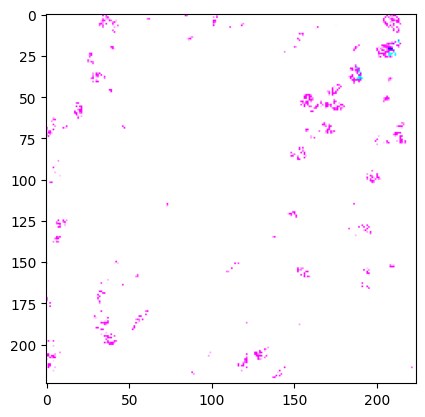

In [42]:
import numpy as np
for images_batch, labels_batch in test_set:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 79ms/step


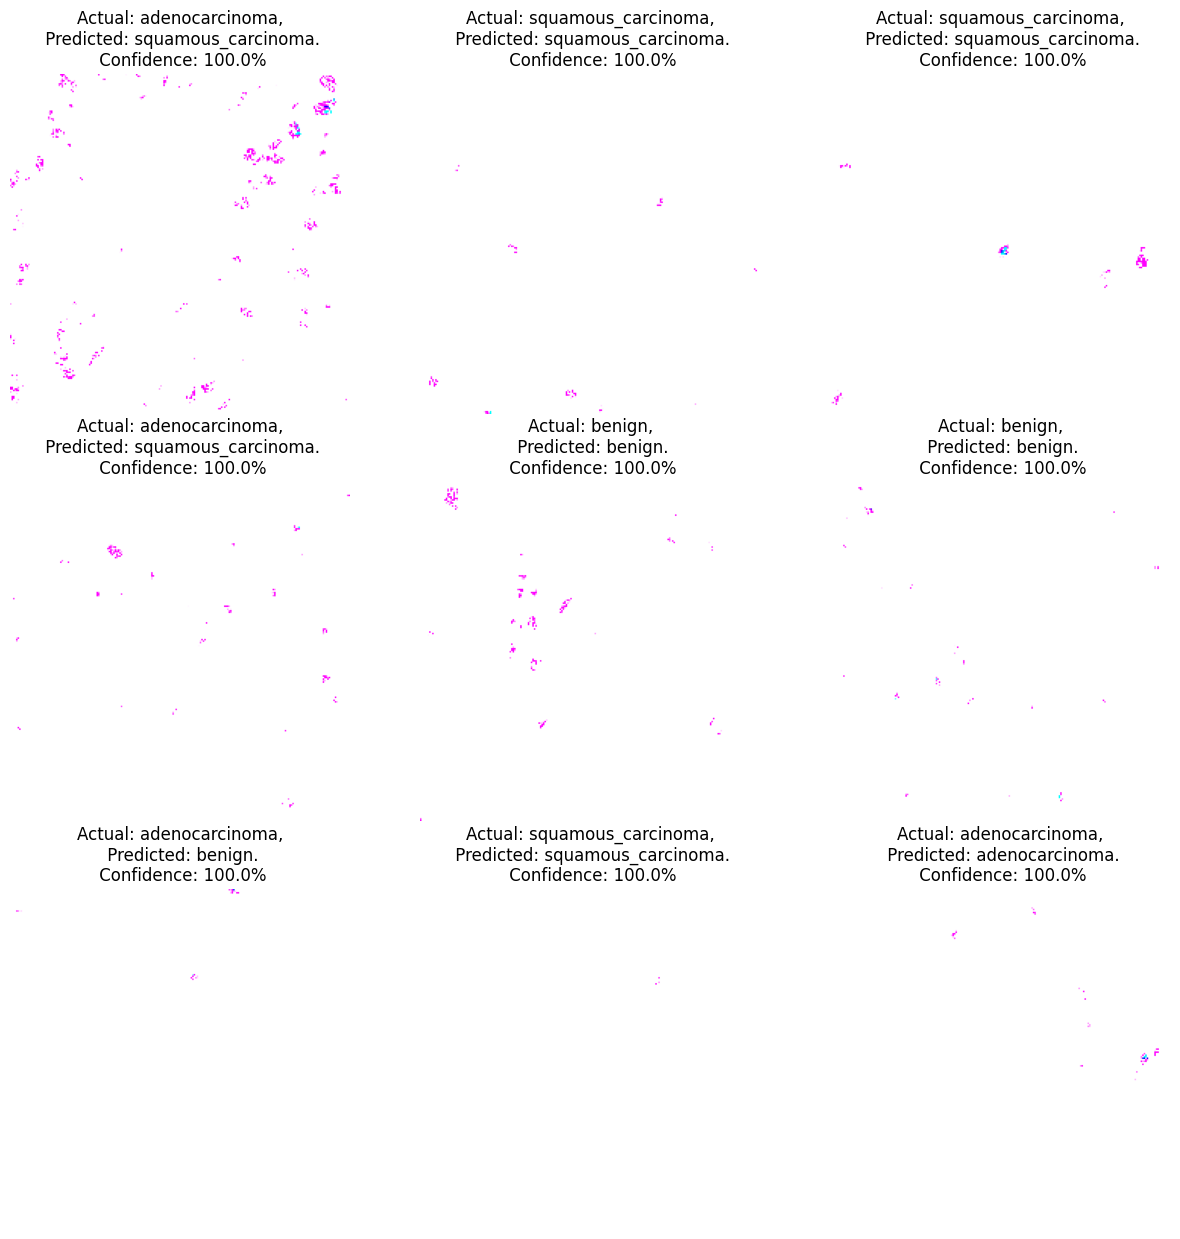

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

Generating predictions...
3/3 [==============================] - 4s 974ms/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.67      0.48      0.56        25
            benign       0.92      0.96      0.94        25
squamous_carcinoma       0.62      0.77      0.69        26

          accuracy                           0.74        76
         macro avg       0.74      0.74      0.73        76
      weighted avg       0.74      0.74      0.73        76

Generating confusion matrix...


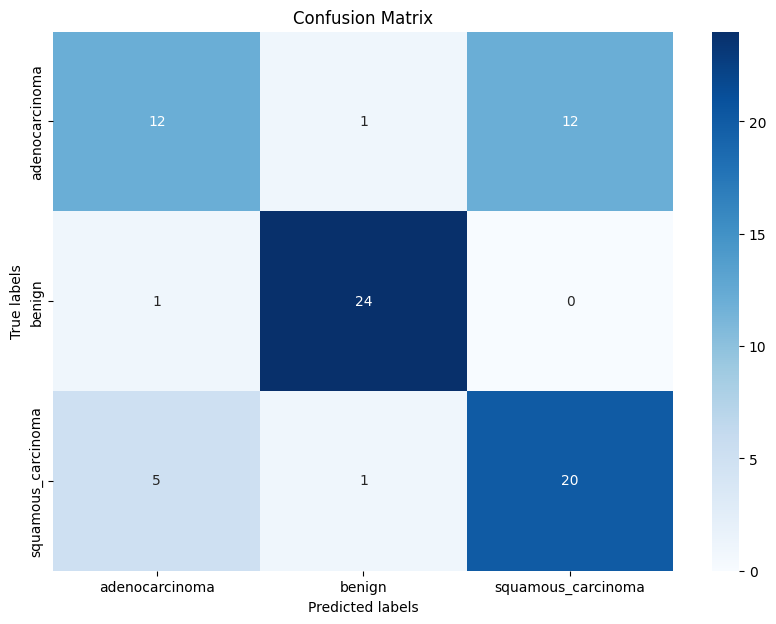

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()